The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
- Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, our objective is to predict the labels on the given test dataset.

1. Understand the Problem Statement
2. Tweets Preprocessing and Cleaning
  - Data Inspection
  - Data Cleaning
3. Story Generation and Visualization from Tweets
4. Extracting Features from Cleaned Tweets
  - Bag-of-Words
  - TF-IDF
- Word Embeddings
5. Model Building: Sentiment Analysis
  - Logistic Regression
  - Support Vector Machine
  - RandomForest
  - XGBoost
6. Model Fine-tuning
7. Summary



In [1]:
# Loading the libraries
import re
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
# Loading the data
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

## Data Inspection

In [4]:
train.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation

you can see that there are lot of unstructured data is present.
* so we preprocess the text to make it ready to analyze

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
# Lets see how tweets are racist and non_ racist tweets are given in our train data set
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [9]:
hate_tweets = train.label.sum()/len(train)
hate_tweets
print('% of hate tweets:', round(hate_tweets * 100, 2))
print('% of normal tweets:', round((1-hate_tweets)*100, 2))

% of hate tweets: 7.01
% of normal tweets: 92.99


Text(0.5, 1.0, 'Percentage of normal and hate data')

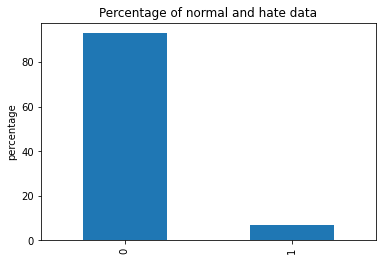

In [19]:
round(train.label.value_counts()/len(train)*100,2).plot.bar()
plt.ylabel('percentage')
plt.title('Percentage of normal and hate tweets')


we can see that its the case of imbalanced data set

In [133]:
train.shape


(31962, 3)

so here tweets with label 1 are hate tweets and with 0 is non hate tweets

In [20]:
# lets look at our test data
test.head()

id  \
0  31963   
1  31964   
2  31965   
3  31966   
4  31967   

                                                                                                                                            tweet  
0                                                      #studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦   
1                                            @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why    
2                                                                         safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!   
3  is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite  
4                                                     3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦

###  now lets look at distribution of length of tweet, in terms of tweet both the test and train set

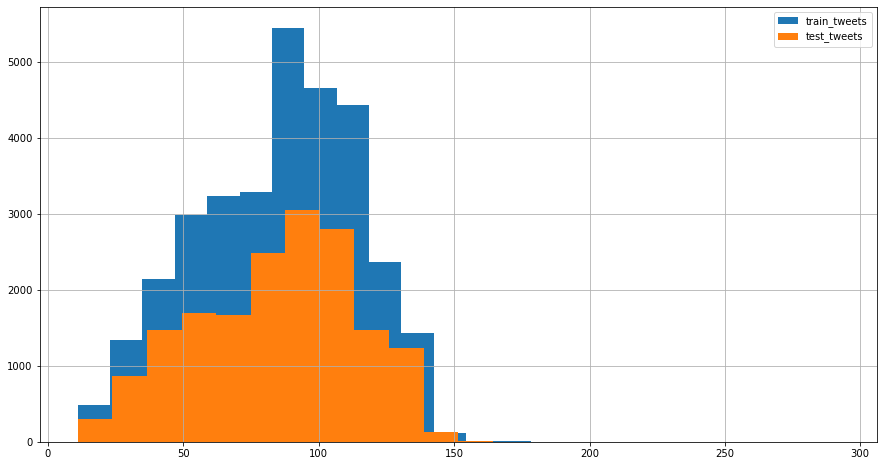

In [21]:
plt.figure(figsize=(15,8))
train['tweet'].str.len().hist(label = 'train_tweets', bins =22)
test['tweet'].str.len().hist(label='test_tweets', bins=22)
plt.legend(loc='best')

## Data cleaning
In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [23]:
combined = train.append(test, ignore_index=True)

In [24]:
combined.tail()

id  label  \
49154  49155    NaN   
49155  49156    NaN   
49156  49157    NaN   
49157  49158    NaN   
49158  49159    NaN   

                                                                                                                                                   tweet  
49154                                       thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics  #brexit #blm &gt;3   
49155                                                   feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid  â¦   
49156  #hillary #campaigned today in #ohio((omg)) &amp; used words like "assets&amp;liability" never once did #clinton say thee(word) #radicalization     
49157                                           happy, at work conference: right mindset leads to culture-of-development organizations    #work #mindset  
49158                                                                                   my   song "so glad" free download!  #shoegaze #newmusic #newsong

In [25]:
combined.shape

(49159, 3)

In [26]:
def clean_text(text):
    
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('@[\w]*', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    
    return text

In [27]:
combined['clean_tweet'] = combined['tweet'].apply(lambda x: clean_text(x))


In [28]:
combined.head(10)

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                                                                       clean_tweet  
0                                                  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction     run  
1                                   thanks for  lyft credit i can t use cause they don t offer wheelchair vans in pdx      disapointed  getthanked  
2                                                                                                                              bihday your majesty  
3                                                            model   i love u take with u all the time in ur                                        
4                                                                                                           factsguide  society now     motivation  
5                                   huge fan fare and big talking before they leave  chaos and pay disputes when they get there   allshowandnogo    
6                                                                                                                 camping tomorrow        danny     
7  the next school year is the year for exams      can t think about that       school  exams    hate  imagine  actorslife  revolutionschool  girl  
8                                                          we won    love the land     allin  cavs  champions  cleveland  clevelandcavaliers        
9                                                                                                            welcome here    i m   it s so  gr

In [29]:
tokenized_tweet = combined['clean_tweet'].apply(lambda x: x.split())

In [30]:
tokenized_tweet.head()

0                  [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]
1    [thanks, for, lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, disapointed, getthanked]
2                                                                                                        [bihday, your, majesty]
3                                                                     [model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                         [factsguide, society, now, motivation]
Name: clean_tweet, dtype: object

In [32]:
combined_copy = combined.copy()

### Removing twitter handles

lets create new column calling it clean_tweet, whic will contain clean and 

### Text Normalization


In [33]:
from nltk.corpus import stopwords

In [34]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [35]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [36]:
tokenized_tweet

0                                          [when, a, father, is, dysfunct, and, is, so, selfish, he, drag, his, kid, into, his, dysfunct, run]
1                         [thank, for, lyft, credit, i, can, t, use, caus, they, don, t, offer, wheelchair, van, in, pdx, disapoint, getthank]
2                                                                                                                      [bihday, your, majesti]
3                                                                                   [model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                                             [factsguid, societi, now, motiv]
                                                                         ...                                                                  
49154                                             [thought, factori, left, right, polaris, trump, uselect, leadership, polit, brexit, blm, gt]

### Removing Stop words

In [37]:
from nltk.corpus import stopwords

In [40]:
def remove_stopword(words):
    return [word for word in words if word not in stopwords.words('english')]

In [41]:
tokenized_tweet = tokenized_tweet.apply(lambda x: remove_stopword(x))

In [42]:
tokenized_tweet

0                                                                               [father, dysfunct, selfish, drag, kid, dysfunct, run]
1                                                  [thank, lyft, credit, use, caus, offer, wheelchair, van, pdx, disapoint, getthank]
2                                                                                                                   [bihday, majesti]
3                                                                                                 [model, love, u, take, u, time, ur]
4                                                                                                         [factsguid, societi, motiv]
                                                                     ...                                                             
49154                                    [thought, factori, left, right, polaris, trump, uselect, leadership, polit, brexit, blm, gt]
49155                                                  [feel, 

In [43]:
tokenized_tweet2 = tokenized_tweet.copy()

In [44]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    print(tokenized_tweet[i])

father dysfunct selfish drag kid dysfunct run
thank lyft credit use caus offer wheelchair van pdx disapoint getthank
bihday majesti
model love u take u time ur
factsguid societi motiv
huge fan fare big talk befor leav chao pay disput get allshowandnogo
camp tomorrow danni
next school year year exam think school exam hate imagin actorslif revolutionschool girl
love land allin cav champion cleveland clevelandcavali
welcom gr
ireland consum price index mom climb previous may blog silver gold forex
selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love
get see daddi today day gettingf
cnn call michigan middl school build wall chant tcot
comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin
ouch junior angri got junior yugyoem omg
thank paner thank posit
retweet agre
friday smile around via ig user cooki make peopl
know essenti oil made chemic
euro peopl blame ha conced goal fat rooney gave away free kick know bale hit
s

happi pharrel william pharrellwilliam lyric
happi w ork confer right mindset lead cultur develop organ work
lost anoth member famili yesterday gut rosi
yayyy trailer morrow fever super
watch fanci tail vine mad mad teeth bite piss dog bite dogbit dogtreat
dreamcatch bull domin bull direct whatev want
readi tomorrow englishteach teacher ecuador
memori wonder dad alway miss etern love strong greatquot
dalla shoot video see disturb viewer discret play loop ove
itako alon fine littl
sunshin amp sticker kind saturday letthembelittl childhoodunplug
wonder day today calm sunni chubbygirl glass finnishgirl finn
buka bersama tma famili yuhuuuuu tma w risha meylucki amp mayfair townhous pic
love know nationalbestfriendsday true
man ran governor ny state biggest african american popul
stereotyp prejudic offer hope solut creat old repetit hate conflict
get pussi quicker day
probabl time come back home ugh
model love u take u time ur
anyon play voez kinda love game game game girlgam voez
mani pol p

ya ever sinc zayn left never
happi father day loveyou fathersday sunday father daddi day
big shock monday need find new home yeah found dream cottag tuesday
save thousand free search x login x broker actor seeklearn stafresh
actual order kyli lip kit
hope famili made arrang make sure bastard get access
socialmedia us firm build nuclear reactor india
smaphon bull domin bull direct whatev want
lifeisbeauti loveit workhard trainhard matter go bless fitlif
oscar tabarez talk lui suarez angri reaction spos dure lui oscar
play njoyhit hitmusicst us uk eur join us nice nyc
onli week go personaltrain full time new slot avail june pls spread
mother take care ten children sometim ten children cant take care mother
thank good night sleep thank posit
play bride nocturn melancholi melancholymus
tvk fathersday father day tatay daddi enjoy wath tha voic kid
thank friend thank posit
thank mason jar thank posit
nigger lifelesson white kid grew blogpost whitepeopl respect
congrat
via jts love sinkthepin

allsmil relax readyfoheday thankstomyspecialsomeon
omg hope fun see selena gomez live went sorri go
father day dog dad realli know show spirit best friend dog
soon seem food gmo labelit keep safe healthi amp
dinnerd love fun love mileston south centr mall
hello sunglass notmin darkerhair explodedhair boom hairdress
club dinner women rugbi present friend love wru welshwomensrugbi
veri profit thing im america
disagre nba suspend even word gofigur
repost repostapp guest
smark friend shop smark
goodmorn world wish weekend everyon aebylujo espa miami colombia unitedst
feel sta avon busi messag order product learn sta busi myavonstori
beauti kelli
come see brooklyn amp host parad sat pride htt
buffalo bull domin bull direct whatev want
bihday lunch dear friend sammaki love afternoon bihday
woke butterfli morn one sleep go
look forward sneaki peek new extens tomorrow huddersfield
model love u take u time ur
pack pay gbp get shop cool home fun
omg luckili got gym site london pillbox workspac c

pure yoga harmoni mind happi yoga yogalov yogalif yogaeverywher
general pull pin grenad pose selfi
never understand whi peopl color becom wealthi achiev fame mess face plastic surgeri
pleas wait likeit followback bmamper bigmouthamp loveit moment
wonder denni grube sta ang lgbti seminar
one depress funk tonight laid bed almost hour listen heavi metal space tire sad
lamp head see fragil saw li
lie disingenu excus deviant remark michell amp barackobama
veri tragic daughter alreadi inspir befor thevoic ripchristina cover piano rolemodel
easi like sunday morn zen abstract photographi ocean beach beliz peac
bullshit thrown muslim
cameo scoot school love express scoot fun
harri potter ticket arriv harrypott
happi thought happi live visual want work toward goal dontgiveup lifeisgood
say soon scene episod oitnb lost interest show oitnb piss mad upset
hope kochi would one venu ani seri nz aus zim
liter polar bear climb race angri polar bear climb race polar bear live cold place loo
see dm plz l

wish would found month ago go save much pet medic
yes disgust hate trumpsamerica hate
bihday hope wonder day happi onli month apa lol great day
today first sunni day year
avocado shoag lead crime spike new zealand first lime avocado guacamol
lost day
ur favorit prof ur prof ur major subj hahaha much feel shalala
coutur fashion doubl hole shark goal woulda sctop hed hat trick us stanleycup
unfoun due forecast even cancel summer conc seri tonight
happi life moto thank amp
tattoo go addict tattoo tattoocollect
watch st show guna lie bit scare imnotgettinganysleeptonight
whi would anyon yes celiac allergi treat one serious
moment find go final euro footbal cc
watermelon natur shot ibiza ibiza lovelif beachday calatarida
gonna put charg budget abl spend noth onli loser want fund cop
usd jpi sink low near blog silver gold forex
year way chester zoo internationalmonth
ideal woman bodi look like healthi
confirm orlando shooter muslim terrorist follow islam quran letter ramadan libtard
get new 

time oitnb cantbelieveiveheldoffallday
final euro pray safe championship fill fair play great footbal happi suppoer
glendal buffalo simul buffalo take vicin home way
onli regret regret smile girl hat hello summer hihi like love like
save login x broker chang meme love educ univers
cur blond beauti lake curlyhair summer
cos know phase
new kick go adida love ig twitter
rum montauk beach coupl dog chuckl summer safe
happi anim via rain anim
smiley face steinbeckandshaw weekend timetoponyup canterburi kent bar
micommun launch th june
new crossov join kia famili name releas would call
fathersday greet son tristan small thing fill live
life grand feelinggood beer colorado nederland goodday summer like like
friendship bull hill climb reach target complet task surviv strong exc
father day beauti dad rest daddi sonni til togeth love miss alway
correct way written matter profess clear still thing
littl burst via
ian dark never miss chanc slag homeland gt gt
happi moment famili famili myfamili fa

take lot make spoil like ludacri
mygift kylielipkit expos dolc socut way
fo woh texa polic chief offic act rude racist viral video
human spirit stronger anyth happen quot quot inspir
mani upsid cto go away busi sunday father day kid steam train ride one
also command shift option appl
watch find dori today amaz findingdori disney pixar kid mickey
biggest lebron hater eah
allahsoil fear monger becom loudest voic know could happen
pjk k suicid number overdos hr irrelev bill thathelpsnoon end dentalcrisi
gazett tomorrow dogmatictroi worldtour
littl saturday read coffe strain choic weekend
seen sever hate thing victim
play karen mari garrett final rose music song
coconut cup paul famili fitmom bikinimasterstrainhard friend chickswholift
great testimoni weightloss patient transform gastricsleep motiv
nova pursuit healthi immun system
euro begin wow fozza italia
count day make day count jeanin vil live healthi fit inspir life beastmod roar biascanlifestyl
new one either way men disgrac themse

orlando love need world today
gop go rapid absolut nut tilt windmil amp realli believ mccain lost ani credibl
clear overoptimist learn poi torn hand fk u univers lov u whyme fb
dad papa best tv movi dad father day jun via
night long yeah friday
care weed radic islam let guess war peopl die polit
cuss amp call racist fb work attir thread yep comment dread wouldnt safe ceain job
got actor id work commerci movi tv show legal sinc actor
af right
np princessestell sweden attend nationalday cute love sweet beauti girl child htt
pet keep get kill rex dire bear right tame firstworldproblem videogam
pickl ball time
world extrem
like think realli happen know better
horseshow bull domin bull direct whatev want yo
lass
thank mountain thank posit
anal bull domin bull direct whatev want sta
beauti venu beauti father day fathersday beauti treat church lunch father day
best week weekend celebr dad th time chill get back diet focus come
perform sign autograph fan wot brother amp man come shoot kill rip

simplifi newlight cinema time success work read love laugh newlightcinema life
wish healthi fathersday dad everywher
suspect henrico vandal mother son racist
fathersday open amp take walk usual see soon
happi morgan saturdayatthepark smile allisgood lifeisgood lifeisgoodwithdog
sad ani group feel need hide love away due fear backlash wrong
rest peac gordi howi sad news morn mr hockey never forget detroitredw rip
usd face fresh headwind westpac blog silver gold forex
yes follow last leg ride stage vivalajomp tdf
afraid final got zx spectrum boot twitter app
father day celebr today us past father
live street extra tree improv happi much year younger walkabl
veri first video youtub v
alreadi knock long day got daddi tire well
everyon thought closer danger move dc turn danger littl closer home need stop
friday breakfast parenthesebordeaux friday breakfast moodoftheday inlov
vehicl caus celebr haiti travel vine
today onli thank understood word word omg mylov mylif
mean cruel talkradio host 

make sad senseless orlando
success posit affirm
tonight night mtg eternalmast boosterdraft joshua tree game
surpris lagi hahaha happi lucki bihday bihdaypay vania
test templat social media use poem wrote week ago broken writerinm poem
use say word bond happen good ol day
christinagrimmi usa gunlaw stop violenc rip news shot onli
food
roger back
tonight dive back destini better watch dog chase tail onli find dog
like watch incred movi pack movingprob
time belgium
take back chicago selfi miss famili smile joy simpl dimpl
feel proud true hard work amp strong hope wil make dream come true
feel super cute today posit cute curl
late night treat hubbi wait bonus recap beyourownboss
miami offic fire target practic joke policebrut newswith
happi littl cherub today jasmineros smile babygirl summer next dress
girl likeforlik cutegirl instalov instaphoto expressyourself happi alwayssmil
somethin weekend still write amwrit
sunday
want leo tolstoy quot inspirationmonday mondaymotiv
renaiss music sty

life meaningless find purpos fax
chippi adam receiv custom satisfact rate solid oak b bar custom
someth go tri new setup audio video pro youtub like
close think becaus unfoun know eventu happen
put work nike cali la muscl smile dope collarperfect ny modellif model modelo fresh
fathersday gift proud dad avail day
gahinwinnipeg wait year see conc tonight night great tix wait
beach lunch girl
thank saturday thank posit
feel recogn express amp manag anger printabl activ color b amp w ver
im ever mom amp also stfu anaq im crazi notcrazi illbeatyou hard
educ turn joke
hair blondest ever happi love blond smile blond
may feel like need run away feel control
think less less ask often want person goal life
travel pari louvr black amp white lovelif photooftheday social amaz bestoftheday picoftheday
never know happen afraid go anywher countri prayersfororlando
quick stop rout etihad rose
veri funni polit everyth anim world much less sever friday
u mean reveal ur marriag date
reason whi suppo moder

enjoy hour everyday draught beer imfl gotcha loung bar bangalor
best luck
guess gonna persist anti irish vitriol
today welcom deleg amp mdambassador
think tri find someth photo shop fuckyoujam
aww yeah good bing bong bing bong
carv fish brunett polishgirl karakalem draw selfi instalik instas instamood hair
love neighbor decor beauti flower
act hate stas wildfir hate instead come togeth hate differ polit view
summer intern andrea dowlen arriv se offic morn work togeth dc
woke befor alarm morn adrenalin nerv
good morn smile
mood hump day easyglam beachvib summer summer summer time
worldoceansday letswork keep ocean clean dolphin mermaid sealif
watch angri grandpa react gift new hous video grandpa hous
glorious day race athlonlif gtr staffordshir sun
total need hr best perform sprint triathlon
go lilhom wake today man shit pleasestoptheviol
updat social analyt success tbt maiala run
hi bridetob bridesmaid even groom find us weddingwednesday yorkshirehour love xx
samanthabe offer respons o

even usa gay still danger prayfororlando whatap
new zealand reinz hous price index mom fell previous may blog silver gold
run kms loveisal pour donner www alvarum heloiseetlesprema
get father gift time father day father fathersday gift love temodel
prototyp bone bone vegan dog ossobello love
tattoo bluedragon tattoo amaz icantbelieveitlookssogood yay
treat naturalskincar product amp beautytreat award win today harleystreet
balanc health amp pleasur fitnessfood weekend tiffani work job travel
upset raghuramrajan big loss india still major india dont care silli peopl happi
day today head love food foodfestiv newcastleemlyn
ase bull domin bull direct whatev want
silent major amp frighten amp beyond pray orlando
cell phone minut ebook funni wacki true cellphon stori kindl smashword nook ibook
save login x broker chang meme love educ univers
let help make bentley famous soo sad bentley
worri peopl chang facebook profil pic status tweet empathet hashtag cdn
make individu everyon right pursu 

might libtard libtard sjw liber polit
vegan challah day w extra virgin coconut oil organ chia seed
best essenti oil heal altwaystoh healthi
still believ babi month old week furriday cute cat kitten catsoftwitt
retweet knaack may wonder dad enjoy fathersday
feel veri happi motiv morn goodmorn focus posit
christian lt governor texa basic say victim orlando shoot deserv
happi bihday oppa bogumday bogummi bogum day bogumday
last day toddington milkshak church build toddington milton keyn unit
day america sad lost live sad famili sad obama happen isla
live girlfriend femal matur webcammodel fat snapchat webcam pussi
whi skip colorado
moon embrac sun kdrama
wife left
ufc pay amanda nune amp still champ whop ronda rousey less payday mil k
tomorrow big releas day know ifyouregon
happi world gin day one worldginday favouritecelebr royal
roll royc wed weddingday wed bride love weddinginspir
tgif ff gamedev indiedev indiegamedev squad
allahsoil correl religion islam violenc
best day ever son seiz

left fitbit american footbal coach see week fitbit
yooo bitch need therapi diqu still want get tf outta still need foot ya ass smdh
monkey around spidermonkey naturalhabitat natur
turn hulk everi time get take st step
let month long spectacl begin vivaespana euro
impoant thing allow child
model love u take u time ur
yesterday amp today mark st time month w consecut high gt yyt last time happen may
babi gb qbit lightweight stroller raspberri bouncingbabi
go floor hype butterfli nervous readi dubnat strengthinnumb nbafin
im actual glad parent back today inshaallah
whi keep post aicl breitba onli one say posit thing pathet
father lie ass terror homophobia orlando kill bad evil religitard lie
carriefish feminist fight amp ageism hollywood pen act talent amp h
fleuri seem know lift cup
wait sta colleg onli coupl month go gotta organis bmth trip excitingtim plan
wake hear peopl die gay still famili orlando
bihday sienna blast
back oslo deliv devop cours
heard love affair soundcloud np love t

us becom violent day pass orlandoshoot
white social justic warrior get wrong via voterid maga p rnc dnc vote
wonder pa unreform labourin alanjohnson understand eu prove unreform time time
went bad day school feel sad sad one care
oh noze block miss stuff
floor cover love band themain cover fav fun love
ask dr rene choos black thank ask dr rene
happi live love dream dreambig dreamfantasyland lifeisbeauti behappi
kind beauti wink weekend smile kiss
someon effo make peopl fan happi talent goe ripchristinagrimmi ommmi justic
iron one respons tweet jeep
forget per megyn kelli fauxnew jesus amp santa also white religion
funni tragic close truth folk continu persuad
train hot weather legit take summer selfi gym healthi
white crowd turn back black basketbal team high school game trump
sheer wast two hour watch much nois crap udthapunjab
london bound see scarlet excit love new playsuit bihday
f king disgust
model love u take u time ur
global may lose befor folk understand
peopl live fantasi wor

put final touch dpil confer uk edit nottingham ht
rain lot never ani thunder one thing miss mn sta thunder
arbi like year becaus doe exist live one onli arbi shut forev ago
interest right uninterest determin truth lack matur amp intellig
go warcraft tonight
best filter love instagood photooftheday swag fashion selfi girl
stock goodi concierg servic moet champagn love
look like dad cuz everybodi tri lie lol dad dadjok persian tweet notfin ok
two drama sad news weekend paradis still host mani angel ripchristinagrimmi loveislov
sta day veri dog give bounc noth
fracus mirag ng web ukhx int next generat web hardcor gabba vk
live girlfriend teen asian webcammodel femal webcam china pussi
great research whi peopl listen music musicsci
patient wait play hype joywav
get readi deliv featur address bright eye group youngster nervous
new zealand westpac consum survey fell previous q blog silver gold forex
green fp baku
ramadan amp holli month maarif
father day father
total group countri made feel 

father day great dad around world
love gift spoon kellogg gift amaz customizedspoon switzerland
cool dlc idea canadian rocki like jasper banff whistler lake louis ubi advidsnowboard
flower doe think compet next flower simpli bloom beauti
im happi smile sma funni fun free freeday gym fitn mytrip instalik
tomorrow day audit rock academi tilburg music
interview next week friday nervous
sleep everybodi sleep kill
work amp week amp read petercarey chemistri year tear blue woman finish yet
realiz suicidesquad come day xoxo xoxo isitaugustyet skwad
michell obama done
becaus everyon victim alway someon els fault
great aicl truth trc need comment back whi need indignen via
swim time swimi swim sea sun sunni beach
amp loveland vive sue cree atrevet sefeliz
rememb hate bitch happi amp happi bitch hate amp bless
grate affirm
food heal bodi altwaystoh healthi
save login x broker chang meme love educ univers
pop modern love cd car stereo ate play eject guess car want eat matt
thought factori left ri

yall say relationship tweet shit like want girl guy amp
last get enjoy
heabroken get starlink brz bought year later subaru brz
fuck outrag anybodi could use tragic situat gain browni point sad amp young children
prep time anotherfinefest hope see everyon around town look stall festiv localfood
hottest man aliv hope love hawaii
prayfororlando orlando pray pray puls love compass lgbt peac never
final get time garden summer lovetogarden
stand line wait get see apark awesom
look yesterday mi look de ayer familytrip girona gerona happi
wow cool weather today tbi cutekidsclub toybus
hey keeweestudio may want check latest updat uk best festiv
mtlecont lecontelodg rainbowfal hotti peac rainbow fall great smoki
aww yeah good bing bong bing bong
respect world peopl think thing go wait person argu
gift music enteain wonder person
coupl day go launch new look finditinworcestershir buyer vinci
supercool aveng contest prize winner ageofultron aveng
feel glad mad scare amp asham valu work togeth find

readi go
wtf pretti sure ca result precinct count big win hillari delusiona
eur usd slip ahead us jobless claim blog silver gold forex
stop save letstalkabout thepoliticalmillenni class educ femin polit
everyon blame black brown communiti crack blame doublestandard drug
happi fathersday everyon
happi friday eve like trend topic comeonfriday weekendsunshin
gold errythang gold baltimor maryland
someday mccain realli answer question complet sell integr
actual loss word word except r p
sensit fan right xmenapocalyps movi poster
want increas level hormon
howyoulivintour orlando fl prayer famili lgbtq lbgt communiti
fathersday hero let us celebr
interraciald see
live life dream quot inspir
calm storm smile day live love laugh nice light
girl friend love helsinki finland fun katajanokka travel shop like
makeuptransform rooster simul want climb vast expans mountain reach le
yummi food foodporn love holiday vacat trip
lost lbs week got slimmer week oh yeah
happi father day goon fathersday fathe

event st matthew hous saturday pa
monday music happi bihday wrenn
wrong peopl abl love want orlando face heabroken cri
good morn new york besid excit croton hudson beauti hous beauti peopl
whi mother friend ex facebook wanna homewreck involv onli teaandshad ht
star war de gbp get shop cool home fun
less hour till find arsene wenger play mourinho pep cont klopp
love
crazi orlandoshoot victim poc god rest soul
thank challeng thank posit
mom told wash meat befor cook imnotdumb thanksmom freakedherout
gym morn gym bogota colombia fit arm chetsday fit fitman smile green man model strong
bought today hope get time later squidg page workintheway busi
glass wine aladdin tv roast lamb dinner cook better half perfectsunday
veri iloveyou mother mama maria god bless
home yesterday honor serv colleg alumni board ceain passion group forward
tech bitcoin revolutionis gambl infograph
last thing befor block repo retweet call nazi extra commentari
real friend smile appear smile joke
credit instagram ahn

happi friday selfi friday
got back gym awesom sad thing peopl follow anymor gym
sad b biburi look forward memorialservic margaretbowen legend year
rip greatest muhammadali
heal fear onlin cours guid inner power
yup concur near million voter
yeah play speyvalley challengetour pro next wednesday nervous
amaz week man hous work done back home relax see besti later perfectday amaz
watch j think poor nicol poor ron
sad gun law constitut doubt anyth ever
info call prime camp kid spos activ summer game
bestsel motiv spos never go bed without dream wakeup without hope
th remak hi token asian chick carolsbycandlelight
member encinita encinita proud keepitloc drcoadi
thought femal fighter doll promot
today stream giveaway stream hope see mani teemoarmi leagueoflegend twitch teemo lol
let hope tomorrow much happier day
deal peopl get suck way polit like actual pa thinkbigg
let get summerread librarylif destinlibrari gamefac
wed plan peopl
gudmrn guy youth conventn church wil b dere hw wish u come

igersbnw attack bull game realli think head empti around citi side
bikini kind life summer palmtre breez place cali california swimwear
behalf soooo judg san diego best danc crew
whiski connoisseur kit fathersday whiski
night read get inspir blog post studentlif
fan oracl arena watch tv draw game seri
right track
thank follow grate
selfi beforheadingout felford bestfriendev loveh
good morn bud breakfast marijuana unleash ibook
wish good day beauti sunris dawn sf street golden cloud blue sky
mitt lost bloodi elect u amaz w live past increas yr med ur stuck past
stas tomorrow come eng
love lavend flower lavend plant pretti inspo colour lookbook
hello guy upcom event june skrillex conc let come us join pay
rd th june help client exhibit royal highland show
goodnight selfi pose pose smile day funni forfunon life
model love u take u time ur
surpris read make gt gt gt betray ka lt lt lt scifi kindleunlimit
damn realli made tear littl mustread
lawofattract heal altwaystoh healthi
thank god su

soloman aswad agre record vers chariti singl songforafrica
make smile thursdaythought
best time ever saturday day pride columbus ohio fun funtim
cute amp yammi strawberryacai starbuck nyc dancer new york new york
carlpaladino hole extraordinair guy trump hero cours gop fascismo wish obama de
tgif great weekend everyon friday weekend like jimcarrey yay friday
miss love brighton homi vegan onwardsandupward
sun shine nearlyfest town anoth cider
convinc boyfriend
finallllli leav work stream soon get home
model love u take u time ur
hear antonyelchin one fav scene curbyourenthusiasm
load mate footi beer bbq win pmaallthetim
grate affirm
im still stun love sinc sta youtub bought song thevoic
phew result noth like get clear goodnew fistpump
russian default posit face accus dope violenc marseill barrel bomb hospit syria lie
clear tell feel graduat happi lit
bihday jesi
thx ur crappi app get discount gas dnt push app work pissesoffloyalcustom
happi saturdaymorn pick simpl step toward saturday m

life amaz happi friday inspir dream instagood life inspir success
choos thought choos bless grate themoodcard via
wait friend finish shift friendship great time
love instagood photooftheday tbt cute beauti followm follow fashion selfi
yearswithbt happi bihday bangtan boy love much third anniversari bts
love father father father rip true ideal father day
beachbodi bull domin bull direct whatev want yo
repost repostapp goodadvic world pound ridg new york
littl walk pub quiz selfi summer lightleak filter eyelineronfleek
sleep
becaus mean
present pink flower
control battl loud soft suppoiv via
unit state industri product mom regist expect may blog
light power time test busi end build process digm
bbc news russia lake syamozero children die storm catch boat group poorkid
new trauma measur publish great work proud pa work group nmtng uhcw matron
race ladi gentlemen canadiangp last vettel vs hamilton
yes today feel
like sleep jok fun funk funday funni tititbocah
collect coverag women relat is

transform tuesday matter hus eye selfi lift lung
man need mycaptainamerica miss tranni ladyboy
right need get good night
thank follow realli appreci xd honor
hot new releas swift sharpen fang radicalis reveng preorder c
everybodi today
lyric hit hard soul
first ipsi glam bag arriv month
ink doe bodi good lovemylif lovedandh tattoolif inkedandproud
butterfli blue butterfli facepaint
whi would take avitar whi project hate n
noth stop brittani wanna babe guess safe say complet head heel one
mom came hous said care orlando shit gay son lgbtiright
real talk ion see girl fuck nigga nowher near deserv claim fuck nigga dat actual deserv lol
joke tire celebr act like threaten leav also move mexico
nigga realli watch trash ass wwe game wow
wish dad veri fathersday look forward veri busi day today surf n turf special
happi happi selfrespect respect life lifehack love diy blog blogger
anoth sad thing brexit amp eureferendum famili destroy amp kid left without mum disgust
adventur posit affirm
want

oh god trigger
thing ever stop orlandonightclubshoot terriblehumananim may god give strength famili
sponsor proud sat juli nd
cni expect remain pressur rabobank blog silver gold forex
augusta buffalo simul buffalo take vicin home way yo
angsti cassett draw caoon sketch doodl aist illustr angst smoke funni
enjoy loveit
ppl wait hrs airpo miss connect flight put flight hrs later
corrupt everywher day even place least expect
highlight europ trip watch bbcworld documentari wood carv inspir travel
lmao rli go school w bunch bulli scream victim
least daz b free frm unwant peopl unwant voic tym home
h appi work confer right mindset lead cultur develop organ work mindset
well deserv love lot thank everyth
bihday dapper
feel sick vile specimen human shame sick whatswrongwiththesepeopl
posit affirm
bumblebeetight time mebeforeyou livebold
im one day get mad leaf fli air x x needanap oml
today french bakeri blueberri madlein readi oven thursday foodstagram bake
happi bowl team player goodmorn mor

ness bull hill climb reach target complet task surviv strong excit
might libtard libtard sjw liber polit
sentlel offenc find self veri bore sunday afternoon use look forward day ay day
model love u take u time ur
might go hell surpris versac
emraan hashmi co star alisa khan found sleep street delhi actress r htt
get get get enjoy music today free app free music
hr school trip enjoy kyoto kobe
thunderstorm get scare come comfo camgirl lip chaturb
acryl bag mini lipstick clutch gbp get shop cool home fun
coffe bacon butti write catch blog post thank
day whatev make focus good bad seem disappear positivethought
list yojana indian govern pdf
bing watch orang new black catch work oitnb
listen morrisey morn good world friday
happi famili famili photo beauti chennai payshop pinkroom twinkl payplann
singl akuharusapa chekidot youtub song hea love brokenhea beauti
us msm barrackobama trump vedic astrolog predict us presid donald trump
becaus trump fascist amp bigot misogynist sexualpred proven 

livelyp let control three thing peopl money past experi motiv
live dream fashion love gypsysoul natur photograph pueobanus
sunshin daisi tote bag great summer hippi flower totebag fashion
need someon talk one talk
ur ur hol u still stop think bout villa
im go see find dori findingdori fishfriday
happi today becaus never know tomorrow bring makeachang
happen orangeisthenewblack oitnb season cantwait watchingitnow
doctor nice
check onlin readi next week holiday
make overweight dog dog health problem
guy lunat angri ignor vicious man
fl woman scream racial slur aim gun laser pointer black mcdonald custom
yun hong wang employe compani happi inn uk ltd see uk hong wang
mani chang profil pic brusselsattack amp mani american dead see americanflag profil
damn million month whi get prenup whyjohnnywhi istandwithjohnni mgtow divor
republican leader block gay right bill orlando attack sick
steak night tuesday night dadanddaught steaknight potd mood chill l l
save login x broker chang meme love ed

funni look side hidden ohh ugli puntacana funni
today new day go shop gettoah retailtherapi
babi fisher price fastfind dome backpack diaper bag black bouncingbabi
obama destruct presid histori amp legend isi iran copkil syria
set first ballincollig cork run
bihday surround peopl love motiv encourag
globalist obama hillari tri destroy st amp nd amend let put trump wh
way justic serv doctor call hav brightest brain rowdyrathoreagainstdo
thank creativ thank posit
cav game plan work srri nba game plan work suspend green cav win smh pathet nbafin
model love u take u time ur
shop girl bachelorett pay
radio show less hour hype exclus check
head dinner hungri
love got see todo next week let know free x
happi bihday thank tiu wonder weekend bihday hukilau
friday anotherwomanwed bridetob
natur perfect bull hill climb reach target complet task surviv str
ecb patient await impact latest measur dansk bank blog silver gold forex
loyalist obsess somm reveal battl boyn
whi whi doe alway emo black whi


prayersfororlando dead injur day
big jump caer famili bigjump slomo video kid memori
placebo sweet accessori flower sweet dool fashion japan shibuya handmad craft
yesterday love life moment hijab girl beauti friend work instagood
grate affirm
tell happi smh ripchristinagrimmi
orangechicken polar bear climb race angri polar bear climb race polar bear live cold place
put final touch dpil confer uk edit nottingham
call carlpaladino step becaus know spew consequ
rage reveng liam neeson sam raimi darkman peyton westlak via giphi
trend topic bihday tupac perezhilton know twitter deal gutter trash
grate light shone dad father day bestschoolinsurat educ cbse surat
brain make us get happier posit good love life
oil drop fuher bearish api repo fed eia data eye blog silver gold forex
annoy get hoodi tri find ani xs anywher
gotta gotta
go hear garbag childesh clown anoth month smh
shutup amp fuckoff fun turn fuck want
wow lot thumb video ouch hate pyrocyn whi puls
funday smile love
peopl make mind

thank god goodnight lastdayofschool
toptweet like one venusexchang
finish prison break life prisonbreak
shame regard children parent world make sick
happi strong run runner run smile fit
saibaba day devote om sairam
let sleep tire af
love quot think saturday strength rock bottom fabulousyou transform
winterfashion bull domin bull direct whatev want whe
gbk turn blue today persibarema final
think read ani fic like
view fab venu summer product arabian night finger cross
vinyl dump bin music record hurstvill sydney cool album
cute
miniatur rose begin bloom garden
anoth year anoth time read regret inform applic select ticket imposs
premium staer kit today happi oiler handbook w purchas
fathersday sexi daddi cute blackandwhit tinybabi loveit
best pa summer take act tomorrow summerbucketlist fun
thank give chanc meet man spend rest life lucki unlik twitterlov
see paramour cirquedusoleil tonight lyrictheatr nyc newyork manhattan timesquar ndstreet
scar cat knight let take control haze remix s

someth make happi second retrain brain happi
gameshow bull hill climb reach target complet task surviv strong excit
amp veri veri relax smile becaus like
time get say notallmen alreadi miss point misogyni
accept fall env engin master program u wisconsin dualenrol engin geoscienc
give hope dismantl system racism alliesforblackl happyholiday blacklivesmatt dismantl
war suck deathbattl fightfor bomber killthelightstour nuke realworld ww blackandwhit peaceday
whi would anyon need ani anim
stroll bay way dr exhibit
dey forget jingl
happi sunday freespirit hippi hippi peac smile posit florida sun
nice inseion vienna wien trip rdmarquitectura instagood instahom photooftheday picoftheday
found brand new hardback copi darker shade magic total made day bookworm
toma completa full shot touga tule crochet tejiendosu os estambr
hate still aliv well see hater orlandounit
bihday bro dj ike naija want may god bless ur new age love dj ike dr p naija
aap congress hell bent vitiat communal harmoni punjab

laugh tweet
spend obscen amount money holiday cloth today srilanka
angel nicol niec nicol familytim turkey kemer time beinlif
sad sad sad good luck littl boy
friend type peopl bad liar wors enteain paasa worst backstabb thetruth
r p peopl die orlando
racism amp fascism get rate amp e peopl resist everi time
kid bless love
happi sunday camillasorum mumabroad blog sunday flowergirl
pa mayo oil clear ooz gross unhappytravel
kaya alex arriv girlsact confer
mxm igazi bore get intens show end nou one must wait anoth dae igazi
award win chilli sauc celebr chillisauc
washtim anybodi drop ball gop pass law keep gun mateen crazi hand
sleep til rugbi
dav enjoy pancak sun justbecaus treat
snap chat updat bihday
vacat go sta soon
simpl yet effect tip advic help journey singl mom aga
joy school achiev educationfest
equat end american tonight year carmela told toni soprano want divorc
kayak pineri grand bend strip beach adventur kati perfect weather fun day sunshin
ballard seattl wa locat open cancel

feel like lose donald trump
god hv merci us countri nigeria news god cri ur merci
nd juli open saturday month trial use loos healthi fit fantast
presidenttrump hope stop fund apaheid terrorist illeg state israel pay back billion
life beauti novel u read end read sad line bad page mean end
new forum pleas help spread word mission help soni ps e e game nice pos
thank swift respons strang email team respond coupl min tweet odd connect resolv
father day late dad pa samuel taiwo adesil tho late memori live
ride die love haley marier nationalbestfriendsday besti smile love
donald trump fire back teen comedian critic weak drumpf us us
ive mine pre order week wizardingworld cursedchild
new look timeforachangeup newlook summerlook
right lone broken happiestwhenimwithyou cuddl needi imissyou
soap make student last night learn make cold process soap scratch
toooooooo much
look xhaka rodriquez play left side pitch doe mean wenger sign
bore hungri keep calm ele think someth good gt lt
cheat day tom

cassidi evan model
nicola lost incred stone goldplan juiceplus amaz healthi smile
play michael nyman promis melancholi melancholymus
ani question give us call help anyway
last day school practic today game tomorrow gotta love haha abe
go listen new song releas vevo soon whatimlisteningto music unsign
bad day friend veri mean sad meaniebeani
happen haverfordwest town realli sorri state shouldbesomuchbett
wait onli moment wait bless mylif beardman beard
sometim girl wake veri happi friday weekend love bubbl ripleyrad
photo greatbarrierreef say worldoceansday
onli thing could make excit trip stone lighter bikinibod
inlov disney phonecas hakunamatata disneysid thank hollybear
crap funer go tomorrow suck becaus mourn person morningperson sleepin cri wake burial
answer repli youtub comment repeat know angri goodluck
model love u take u time ur
icon brand associ trump brand tarnish reput
fan wapo love stori see quick divid tragedi orlando
ignor confus disappoint mani year see chang sad tri tr

shopper riclswtravelbook bearlovestravel trip travel singapor enjoy
va boston jersey texass summer look great
ticket billi talent bought billytal
keep enjoy enjoy keepenjoy funni loveforlov love love likeforlik
allahsoil peopl origin meant white landhold male
girl get attent talk shit
cuti booti booti cuti bliss life cali sf sanfrancisco giant
wish offic glass lakelif wakeboard wakesurf slingshotwak
lubachka perform px thelifeerot blog silver gold forex
gold lock tight rang abov fed spotlight blog silver gold forex
rest peac bosom lord stephen keshi goat generat super eagl role
sleepi tigh tight respect swag selfi pixel pixela aseprit
saturday weekend plan let us know shopthemint weekend
feebl desper attempt turn public mood syria come next muslim falseflag op cnn bbc
sometim let go
freedom friday dish toa salata puff pastri spinach ham mozzarella girl
find sad disgust gorilla incid way outrag weak stanford rapist sentenc
oil intermarket dxi ralli toward keep lid barrel mount blog silv

got potato
sometim okay selfesteem lovethyself
pls like post
wish youth member great time eular today trip near befor sta
justinb gorilla simul need adapt environ need tear citi materia
creat smile offic employe
veri look damoor afternoon
bihday rapflashback gemini hiphop california nwa westsid
father day wonder men
dream never big ever lose mindstat congratul
awesom rare wild hype phenomenon actual live hype
thank summer thank posit
cat lol kittypillow kitti cat cute gaycut smile imgmalemodel fordmodel lol jk
eur usd attempt rebound us cpi blog silver gold forex
danger thing democraci choos leader trust form govt never follow democraci
inter terrestri scifi sciencefict kindleunlimit cent januari kindl
watch stream
throw pay give gift tweet bihday us lt
peopl onli use social media make viual friend getalif growup
dietitian win lunch break bingo
whi travel pa life via life travel
retweet leah darrow countri desper kill children prayersforal
ecto cooler back sold ghostbust ectocool nosta

biggest blat ever seen flavor factori yum nevergiveup morrobay
shameless season orangeisthenewblack oop got troubl tag
final found way delet old tweet might find use well deletetweet
homegirl
pardon ignor unitytv
stop act small univers motion joytrain
arkansa gorilla simul need adapt environ need tear citi materi
belov avocado toast avocado toast fresh vegan healthi pari franc
well said staywok
gone one factori town busi fli ralli spot leav curios
alway golazodealexi
realli readi week end quick ho hum
order arriv thank w indonesia indonesian cosplay
cav win cav fan kyri lebron hell yeah cav gsw fan ref paid fvck throw damn lebron
tt isleman noh east news live nohumberland sidecar rider ian bell die isl man tt
guess trump suppoer ignor inde bliss trumptax trumpli trumptaxcheat trumpunivers
day nice day
step puddl
watch udtapunjab know realiti bhagwantmann ghuggi tell bjp
father day
boom work smile photo tumblr cool music selfi dream swag girl boy
turkey budget balanc dip previous b b ma

brochur aist talk juli
true love true love wed bride groom tear cri tearsofjoy marri
rhodonit earring rebeccamoondesign via pink love heachakra hea lover healthi beauti
lazi christian caus think kid taken thought crime twitter post lmao
wow realli whore
oh lost earring wear last post
pay hard love instagood cute photooftheday smile beauti girl fun
healthi independ women onli take state forward upcm yadavakhilesh womenempower
prfectpitch miss episod play back
hello newyork newyork love fun yeaay williamsburg nyc
love abrahamhick lawofattract healthi heal joytrain
magic haircut pink pinkhair bubblegum love kawaii
black fuck rap sexi women bihday nude
analysi amp blacklivesmatt total touch amp repres spirit islam ris
inez blond get excit strip facebook get inez blond strip facebook
ex greek finmin varoufaki brexit restor sovereignti british peopl need blog silver
honest women someth wrong realli jump defend gun alreadi
look feel joy join speaker free summit unleashyourjoy
sta laugh cri on

scott brown gang bang societi somebodi hous plus web ukhx int web hardcor gabba vk
addit add ad hominem attack basi fact
fantast day yesterday brilliant cours well organis well done everyon awa mud mudrun fun smile
model love u take u time ur
herbalremedi anxieti work altwaystoh healthi heal peac
check new toy
go night fish nightfish dont look
amaz health benefit cucumb healthi altwaystoh
today outsid world wet summer run away evilweath
bad thing happen tri remain posit even hard posit trytobeposit inspir smile
pray orlando orlando loveislov protectlov
got new ecofriend bag gabbi amp gia bracelet rest made america jewelri ex
love book read bookstagram bookgeek lovebook loveread
pick ticket sidney may ball less week go cambtweet
factsguid agre motiv
got ticket oitnb premier pay feat wpaoitnb
arriv thank lb lyric lb lyricsborn kickstaer
saddi fatti bigcheek smalllip fatti fat snapchat explod puffedup
hey look profil knock someon might want chang
new episod come august rd syfi simpli pa w

happi th month ngit love lot
want creativ worker give enough time play success quot
could us liat channel orlando mass shoot di snapchat realli break hea pic
tomorrow night watch space silenc music musicvideo baranova
wait new releas
bihday boy new bihday bihdayboy bornday love like share moment
thank favoritn tweet appreci deserv follow makemoney nbafin euro game
gorgeous matt lippi arriv plan
dad usual load w snack today truli
someon comment video say saw play slitherio make realli love connect ppl irl
happi everyon suppoiv friend thank amaz respons bros best epic
nice even event ingolstadt best friend got goodiebag earring bracelet thx
session week butterfli nervous
jokeoftheday pun doe tornado black peopl common onli take ruin neighborhood
happi friday sholi wish super duper day ahead
dad diver father day
ankara london sew servic new line offici underway onomen superwax ankara
swim time zoe famili love swim pool weekend fun crazykid
dog enjoy nice weather spafac dog
day til amaz pe

best fuck news life done guy bye yup later idc kany ilovemybroth
blunt languag cologn polic announc racial profil main station
lili white liar lnp toler corrupt except lnp corrupt deceit
orlandoshoot flag half mast victim
great seat wait boston comedi
got entir meal free thank listen servic feedback compens
sikh templ vandalis calgari wso condemn act
vestal newyork pupil su school district alleg classroom incid usa
get see day bringusonstag
pyrographi eagl taller show mya express work work
monday monday motiv styleoftheday lifestyl quoteoftheday
good morn woke w bellami brother follow gift snapchat g b
check facebook amp instagram inform youth confer servic project pressforward
bird amp bad piggi finger famili nurseri rhyme lyric via
feel numb amp empti day inshock singl tellmeimdream wakeup nightmar
wait get iphon tweet time iphon
right everyth seem fall right place
choos crack child year uncooldadhabit
graduat univers still manag somehow use guy bathroom
monro amp nick best friend am

industri wast gang less harm hindu dip gang sickular libral logic n sorri
happi visitor custom mahom pillow marioaavia costarica home decor textil
orlando get break
monica tessa happi sinc blow hard facebook tessa monica sinc blow
gym thing happen day gym gymtim goodvib love peac energi
fashion true fact
thank autism film plan hot amp andrew hard work come togeth xx
check kid see back
thank best friend thank posit
orlando fl taken mani l week
anyon say sunshin bring happi never danc rain danc neoballet
never
never understand perfect sad boy boy love k korean kpop arab exot
leader someon alway watch gotta alway keep real first first first monday yall
get hype rememb tour novemb w
brock rapist spoil white kid ass would gotten year merica
stressfre free intro vedic medit sunday juli pm w th st chicago chicagomedit
real jeff session neverump swampmonst
excit stuff happen kareok havingfun lol thank god music loud caus terribl singer
chill relax piano music keep pet quiet dure juli th firewo

hang tabl tri sneak food mommi austin atx summer smile life dog
face stuck airpo befor secur happyfac candi
went fye album wtf notbetterweath
smh sad real sad u gotta find negat lbj made histori bk bk tripl doubl
team suppo season euro goodmorn voylla jewelri alwaysbeauti
boston buffalo simul buffalo take vicin home way
shopnow highwaypay bihday tupac tupac shakur joyent via latino voic gt gt
month kobe enjoy thank love coupl instagood instalik instamood instaday
vijay veri veri good morn dear sweet friend love day alway god bless morn
snookum mad berni chan good trump campaign pathet
six scientist six suicid secret die protect goodread learn secret long life
random bihday bourbon day befor bday week day bam
hide anoth vip client complet differ
welcom southwest monsoon flower mychild chill
continu tell love stori stori ferdinand peac kid childrensbook childhood
must sad fun meme meme gag gag footbal soccer ilovefootbal
jccppgh jccp shout dad put us say yet
happi friday fantast weekend 

father day one
ceain tip point countri
wit year old grandmoth tear huful word
wine wed wine cellar vineyard famili heritag wed drink hunter
jb mama role r u im ss im u see kettl smile sun jb know u amp sad shahada amp fri
saturday pay hawaii collar drink pay saturday sunnyday friend luv gf
everi man want order need first understand happi
sinc vote right act dem blame republican biggot new buzz word racist
fashiondiari bull domin bull direct whatev want wh
want photo smile live model babesinabathtub lamod
bg amp e ubi
daddi girl father day
takeaway order
obama amp hillari divid america arrest made burn black church black suspect arrest
omg sad dead understand shit fli away angel rest peac idol ripchristina
michell obama ape heel case begin donaldtrump america
shock loss great talent hea break usa
punjab green revolut drug revolut couesi akali congress udtapunjab
starv love right see love one heaven
p e n today pm longweekend
ala life isnt easi press comput key
fave girl london unit king

team sing happi bihday dane starn basebal bihday
lamar hbdkendricklamar lt best rapper fuck world nigga
still proud one misogyni culturalstandard women makeup beautystandard exhaust
johnboyega cast pacificrim wait
launch night realli awesom resourc amp villag
thank eah thank posit
right wing member back fp gegenrecht nostrach fp noafd nopegida popul
get readi sta collect sampl dna test
good morn sunday funday coffe sunris weekend riseandshin makeithappen
muslim famili use decor home show r sta ramadan
aist shop threadless open check design
could someon pleeeeas tell time abl cross ournewbridg
song music originalmus rightframeofmind piano singersongwrit
tragedi happyday knowledg empow site love blind onli marriag open eye
bubbl oldest pilot whale captiv die seaworld anim whale
mountain beach solac seek beach beachlif natur beach beauti men guy
latest blicqer daili thank ad
love day look miracl
amy thoma ticket see sammi kershaw live look
happi work confer right mindset lead cultur devel

whi cancel silent hill p silenthil silent p scari game e horror outstand gotmelik ruin fuck
pick line
omg yes made bus stop anit late thank fuck even tho got later bus luck realif
yayyy final got tresemm voxbox voxbox campaign checkingin allsmil
ahh year ago ibiza shell serridg memori friend love
love custom care suppo yet paid bill still nice
let make key impoant year resist fascism xenophobia homophobia amp
tran bigbadboii dragon boat festiv
bet someon one ever gonna see tweer ever
bihday godmoth
bless come form one em babi emori jahbless
aww yeah good bing bong bing bong
father day humanhighlight
thank travel airplan customerservic
summer time love girl selfi sunni summer hot
avocado breakfast feelingdiet picoftheday
seem better
priceless smile sky amp su love famili oldersist littlebroth babi babyboy
best day summer relax life friend girl instas instadaili
pay selfi yesterday selfi happiest k
sick tire stupid conspiracytheori video orlando shoot word tha
n healthi true measur woh i

slovakia headlin inflat mom declin may previous blog silver gold forex
upsid sky sun sunset throwback new idea natur upsid eah
rememb enjoy life spend everi wake moment oppoun time chase money relax take enjoy ti
happi tuesday world monicapearl starrdaiquiri amp sposbar
father day father father
prison big busi america wonder justic system corrupt quick prosecut
never realiz guesswho
springfield bull domin bull direct whatev want
school forget child dure spos day get run absolut fume upset
love leav room doubt love know lovewin
helper refer domest worker becaus lack respect black cleaner disrespect blackchild
mark calendar caus come august
alway buy app jazza ay game aypay
relax relax summer sun sea beach holiday sunday natur enjoy
fun rainbow hair hairdo colour hairplay salon
ignor parrot demis vote new master rather advoc fool informyourself mediali
daili remind blackandwhit blackandwhitequot quot love lovequot quot crush crushquot
thought alway power make someon world need lovewin
ru

snow white open role sleepi sneezi bash dm us today appli
dodger offens look like warrior offens tonight nobueno pathet
onli moron appear dashboard truelysad
thank u soo much cristina pasalubong hehe thank friendofmin gaisano
angri squeak frog video frog natur anim cute ador
bihday sexi girl get caught sex public
parachut great song emotionallyconnect go boy love u r talent xxx
ms leinonen son b u alway condol orlando famili b c islamiccoward
u know meant b flourish adventur amp realli live ur life way
love ocean love life worldoceansday ifw indonesiafoheworld indonesiafoheworld
wish dad veri happi father day fatherday pageantdad fun missusa
price tag expect big thing seem engag digit transform late
thank abl walk thank posit
wife lifetim movi alreadi know go happen badnew
feel aw suicid depress depress lone
go see reginalddhunt tonight derri comedi
outrag fli sexual predat stupid man made feel guilti im asshol
feel sad today go good friend funer funer taught lot sta great man father r

happi thursday morn smile picoftheday brune blueey
makeup pre order arriv month next month aaaahhhh
set four gl gbp get shop cool home fun
saturday may sta still contain caoon chorizo egg coffe
whi social media church make
planner way stay tune review youtub channel arriv teach plannernerd plan fun
hors crazyhors love sexi final fleur papierpeint fun
friday get amp excit gayweekendadventur gaystud
luch time veget buffet fresh healthi food travelingram
work fun tbt donjulio tequila diageo promomodel promot brandambassador
fathersday gift proud dad avail day
holiday sark book bring
sometim need touch love loneli
found made b honor roll
realli toyota close would deserv victori much leman
take warrior warriorsvcav
best homeopath remedi anxieti altwaystoh heal peac
fear muslim grip nc town hard ani regist w countri call
saysometh bull domin bull direct whatev want
drakeandjosh buffalo simul buffalo take vicin home wa
justinb gorilla simul need adapt environ need tear citi materia
thank rain

work yall
onli episod left gameofthron
selamatmalam coffe time thank visit beauti long weekend
stop hate show love clinton iowa cnv week action bl
model love u take u time ur
happi gay pride los angel gaypridela losangel
inlov eusoubh passo pizzajazz
wimthetimcsc leicest ticket book bring new season celtic
onli three ticket left join us amp exclus event tomorro
father day dad king best dad world doe best
sea today anna yuina enjoy
franci underwood seen leav marseill nojok
jar would alway empti depress
black waiter cannot call anoth black man black next call mother pension im labe
wish men brave enough take behind first round orlando hindsight
yo paul dumb shit look mirror cowboy crowd lane trump keep bs
chang chang better two differ thing olsb selfi smile
dear would pleas ask shameless give
life bless cherish everi moment bless blessedbeyondmeasur life
aww yeah good bing bong bing bong
feel stori recogn express manag anger printabl color b amp w
amwatch frightnight amp come look info a

whi russia lose slovakia euro soccer championship soccer euro
may contribut women drugabus find epiprof deborah hasin
anoth film syndrom
divers offic state among thing killallwhitemen yet becaus ethnic minor woman
siguem en twitter en insta en snapchat ta amaz season nighttim holiday
realli sponsor year thegamefair
best pa today wwdc
bought check period proof underwear thinx oh get u
feel shatter destroy stop love heastopb
watch ojmadeinamerica sinc miss last nt j rappin amp sell orang j smh
happi take practic need help happierbytheminut
bihday bihday bihday june givethank
wait treat kid knew bowl alley
anoth exampl religiouspsychosi epidem brutal amp ignor
thank obama ghetto ladi boy world power obamalegacyoffailur dnc
awe blowfli dead found
bihday day glamour director koala shiwa janatha garag ntr
love servic babi love furri famili caturday
ppl steal tweet
bipolar alreadi stigmat attach doe help add lack knowledg
feel get finish garden look point garden feel
might chang upload youtub

watch weddingplan peopl
bitter unforgiv focus love joy peac jesus
much hate say want hatr embarrassingbehavior ironi
good hea good thing sometim
peopl slate parent mani kid mani never lost sight kid momentarili gorr
love monday love work home hustl juiceplus
mirrormonday like
thank strength thank posit
omg realli interest thriller concept hit amwrit chapter wput away firstnovel complet
thank app thank posit
quot
pll chang life cannot wait season
use power mind heal bodi altwaystoh healthi peac
dude bedstuy ny die orlando shoot wknd bday come back sta new job
real post damn kid hold dream hockeyinireland wow
yes inde may react way face xenophobia homophobia shot took photo
era hippi enviro takeov
repost soulightmov soulightmov love spirit peac free quot
hate fill republican stop think loyalti nra long enough show empathi orlandoshoot
love franc club street music pride memori pay follow follow f f
quot week one nurseri children know school cool eytalk eyf
rooftop pay pay fun london rooft

go pride tomorrow
sta laugh cri onli make sad laugh cri distress anxious chang mindset depress
eur jpi bearish handl fxstreet blog silver gold forex
love piko dress wait get ilostweight idealshap
still believ drug punjab
question eye girlswithtattoo longhair brownhair love
model love u take u time ur
follow snapchat awesomecuten snapchat selfi happi love bff yaaaaasss
checkout today trend gif day rock boat new kid block nkotb ecstat poptv
know feel full happi know feel great dont woodi happi summer
still sad ig taken live without
decid chariti ball date yet ton idea
super posit affirm
welcom connect also wednesday
blair brown happi sentenc orang role anoth happi coincid role brought
doubt rock stage
work hard pay harder weeknd
book readi construct austin csi construct
love work passion collabor determin prepar plan ht
sorri must behind queue hr poorserviceqanta answehephoneqanta
finish custom tripl scoop ice cream cone charm happi weekend everyon weekend icecream
face someon suppos sit

day get meet kelli
oh admit small staff flipflopp disgrac
damn friend still highschool
natur order peopl suppos die day man job take life
alimaong year old today bihday thank suppo million patient treat sinc
amaz health benefit cucumb healthi altwaystoh
today coordin today coordin adult ootd casual yolo happin bubbl
bestsel top sale never go bed without dream wakeup without hope
famili dinner applebe great yesterday pasta love memori ilovefood familydinn outing
repost repostapp love fitspo ladi cut
liter onli week eeeek mfcamp
money never make unhappi person robe kiyosaki inspir quot
ad video playlist finger famili peppa pig bird costum pay nurseri rhyme
whi u chang ur api polici
smile camera morgan winni amp shep tongueouttuesday smile dog
almost fit kiss cam
holiday fun social relev podcast celebr bewitch xmas ep
pleas retir nina turner add noth point frank turn channel rather listen
sea shepherd suppoer racist antirac seashepherd
de gea unawar real madrid interest amp spos interest 

sex video onlin young porn
first day beach wed nervous newjob
trump republican understand overwhelm major white america stupid amp racist
john today day
eur gbp recov turn posit back abov handl blog silver gold forex
friend leav behind go colleg
grand yetta dead
colour moment amaz creatur beautifulcreatur animalphotographi fun girlstravel globemad
know posit affirm
model love u take u time ur
fashion true fact
realli enjoy prepar amp knit babi month pregnant knit babyonboard feelinggr
okay selflov love ilovem quot quot quoteoftheday happi life wisdom motto
flight japan dure game buthappi
espn amp lebron lovefest must ecstat draymond suspens almost look liken fix game
trump associ bomb back stone age belong brainless cunt
spot melhor lugar mygarfield boyfriend
father dayther word describ sacrific
make angri democraci ourrevolut ourdisappoint
friday hour plain better come work grab ici draft beer homemad brat
sometim take smile smile via
ppl beef child suppo murder spree go orlando
canno

orlandonightclubshoot rip ripchristina tragic shock worst mass shoot u histori
expect live tweet dure long okay good loveislov
medit gorilla simul need adapt environ need tear citi mate
time barn nobl
politician worri abt peopl safeti busi cover
let freedom reign us
thank
get realli pride week love rainbow dildo got
golden state biggest choker seen decad watch nba final embarrass unbeliev nbafin goldenst
moment retweet tweet everyon els
thank read two handgun larg hunt knife better secur
heard posit negat amp want american pa
bunburi saturday night bestnight payhard bunburi greatmus greatvib funtim
team fathersday
thank puppi thank posit
great day kick butt becaus happi bless feiday wonder woman strength hero
someon follow steal idea email februari ask ks suppo h
miss throwback
haford buffalo simul buffalo take vicin home way
happi bihday queen tzuyuday
whoohooo well done brilliant boot news come soon equinehour
order shini new lightweight hoop make trick easier chunki two hulahoop lov

rainbow follow day mix remix blendday design design
blame disney becaus let child paddl area wild alig takerespons commonsens
feel like live someon els life long ownmylif takecharg health mindbodi attitud
wow face vega even yet lol
day
japan machineri order yoy came forecast april blog silver gold forex
true dumb dt credenti potus basic affirmativeact move
onli one week go runjericho email gone runner pleas get touch receiv
smash weekend cepen park lot great memori serv numer pai book mani happi team guest
edc look lit nextyear andultra moresad nomoresnapchat thisweekend
mad adventur time finn finn human via giphi
see lill loud overher
visit list busi avoid grabyourwallet
ty share beauti dear friend ana
happi bday year
lightroom bull domin bull direct whatev want yo
aww poor jack
soccer spo soccer fc j ajinomotostadium
day auctionwar suppo june th sat medicin hat storag
tonight sta rip l c e stori june memori wwii lidic bohemia
head readingrecoveri award morn
plum grown everi contin ea

libtard presid usual condemn take action libtard
jeeh soar divulga oeparceria inshot girl cute summer blur sun fun dog
alway badboy imag sinc tvxq predebut yeh notsurprisedatal
news time southafrica becom death announc time lot polit kill happen
bihday surpris anna bihday bff love fun lol
defend indefens
donald trump never ask god forgiv ask american peopl forgiv
lyin crookedhillari continu illeg alien treat better veteran h
care lebron lay ground act hu embarrass spo man even land h
watch man play elderscrollsonlin ps bore funni
thank abl think thank posit
go taco margarita girlsnight sobless ladiesnight
suprem cou philippin celebr th anniversari today anniversari
thought forgot silli notmypr took betti break rest marathon
smile smile everi moment edoardobiagiotti smile musikitchen
got engag threewordtweet dublin live wed
happi w ork confer right mindset lead cultur develop organ work mindset
book german coloni global age ht imperi blm
need address dehumanis amp stereotyp tackl employ

long find pud blue pink shop time blue pink
usd vulner downsid fed reduc number plan hike mufg blog silver gold forex
good night smile watch tvpatrol
final big enough leav hole soon leav someon snatch kill whi let free
young ladi purs dream singer peopl sometim r cold gun violenc control prayforchristina
make piec love handmad nofarszigeti
censorship
incom becaus love ad enough valu
great piec ever think career would write word pres candid
cool time hour
tell triumph crowd hea sole confid sorrow edward g bulwer lytton
close border hater like insid
good night smile
anyon els think record month ar sale especi fl orlando pulseshoot guncontrol
look arriv morn proof first card collect scia crafthour saturday
prayfororlando move love n less hate
unbeliev knobhead trash th
alway sound angri bernedout imwithh
look cuti cute dog funni puppyey puppi
houstoncomicpalooza come cphou comicpalooza comic fun event
prob right wtf
congratul row follow olympicgam roadtorio
babi taeil muachhh
less hour mo

excit girl sunday labyrinth girlsnight popupcinema
threaten file left room
revolut occur marx expect teambt teamsuperjunior
lover stop angri visit us gt gt gt lover friend astrolog love
besti beer amp cannot ask anyth
u escap ignor hate
picsa sticker cotton europ adultd click watch
smaphon bull domin bull direct whatev want
sooooooo friend nomin perform tonight toni
want happier ask simpl question everi morn
land
awesom fadil awesom holiday holiday travel exploreindonesia explor
soft beauti first time hear one veri nice
teatim busyday play beach greatview sunsout tire
jack russel gbp get shop cool home fun
model love u take u time ur
grate affirm
thank soul mate thank posit
ny jofferi
hurri last worldteamusa muaythai mma bjj champion legend fit fun kid
love island host carolin flack sing happi bihday queen kind love island host
photogrid bull hill climb reach target complet task surviv strong exci
jacksonvill rooster simul want climb vast expans mountain reach leakag co
st juic experi 

thank good hug thank posit
gameofthron marathon season till yay look forward
tell version lie hatr vile attack upon black men women theron
tech fidor kraken want creat world first cryptocurr bank
ukip happynewyear delet cooki relat back good old invent fraud paedo time
get paid tomorrow day play box arriv tomorrow well
pleas pray children teen color live fear america afraid target
butterfli live fli anoth day lemon tree
thank sunshin thank posit
model love u take u time ur
littl boy get big spend afternoon big school bigschool notmybabyanymor
reckless illeg indiffer car driver cultur excess singl danger condit motorcycl confirm repli
want tonight catch year cri go world
enjoy holiday season would like watch good movi amp reflect va racial histori
well great week fallon nbc nbc studio rockefel plaza
wow hu feel guess check feed matter interest mean ladi love
father day
b day yaayi keepcalmitsmybihday ofi sparkl mood bihdaygirl smile besti laydinr
help rumi peac love life happi
ur remini

dinner mom babe good babe mom famili dinner
cad set employ tds blog silver gold forex
congrat dude nice see hard work pay
look forward award monday amp mani inspir student getinvolv
gluten free chicken noodl soup peac love organ vegan
pretti posit affirm
aicl year old noth chang gotwors diabet diabeticretinopathi blind
new content come ministri around globe soul
black racist fine r via southafrica saa
pretti sad group peopl get kill peopl feel sympathi becaus gay
bihday chris cain
back home babi soooooo trip excit
monday morn peopl x
get error messag asi tri input tonight blue jay code mbj anyon els ani luck mybluejay mbjcode
gonna come say yeah hate immigr
sta today happier healthier terriann dietplan weightloss youcandoit healthi
caturday mr snook mine though wake find asleep head onc cat
filter taxpay money daughter extoion lock get money back
pray orlando riporlando keepyourheadsup prayingfororlando pride
mondaymotiv follow amaz sunday happiest k colourmehappi
selfi time colombiana

moment realis life candycrush omg wtf touredaist makecandycrusha
kimkardashian view amp littl compass shoe
itveuref rudd woman think b speak statement ask could tri stick boot
leav green bay hour cominghom
sure brag veri share tell differ phaseeight
onlin sourc system open talk us live websit time broker
book season summeim talent onset week behindthescen shoot actor model
airpo live act tonight music pantamazisou picoftheday athen intern
arriv hq nfptweetup
amaz bit recognit ur hard work put spring back step
last day barcelona citi love peopl friend instagood instaphoto tower fashion
sad moment fall friend zone thatsuck friendzon
nice tri tri justifi burn fail comment alway tri
look arriv today leanin thebodycoach
thank wake today thank posit
side word describ anim smh stopviol
choos behappi today happi weekend zen peac dharma goodread
dog campaign share friend amp dog adopt longer need dog pass today day rescu
lifelam tongu green glass shade zara
hill km mountain hill unreal wait sis

In [45]:
tokenized_tweet

0                                                                   father dysfunct selfish drag kid dysfunct run
1                                          thank lyft credit use caus offer wheelchair van pdx disapoint getthank
2                                                                                                  bihday majesti
3                                                                                     model love u take u time ur
4                                                                                         factsguid societi motiv
                                                           ...                                                   
49154                             thought factori left right polaris trump uselect leadership polit brexit blm gt
49155                                         feel like mermaid hairflip neverreadi formal wed gown dress mermaid
49156    hillari campaign today ohio omg amp use word like asset amp liabil never onc cl

In [46]:
combined['tokenized_tweet'] = tokenized_tweet

In [47]:
combined.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                        clean_tweet  \
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction     run   
1    thanks for  lyft credit i can t use cause they don t offer wheelchair vans in pdx      disapointed  getthanked   
2                                                                                               bihday your majesty   
3                             model   i love u take with u all the time in ur                                         
4                                                                            factsguide  society now     motivation   

                                                          tokenized_tweet  
0                           father dysfunct selfish drag kid dysfunct run  
1  thank lyft credit use caus offer wheelchair van pdx disapoint getthank  
2                                                          bihday majesti  
3                                             model love u take u time ur  
4                                                 factsguid societi motiv

## Vizualization from text

In this section, we will explore the cleaned tweets. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. Do not limit yourself to only these methods told in this course, feel free to explore the data as much as possible.

Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

* What are the most common words in the entire dataset?
* What are the most common words in the dataset for negative and positive tweets, respectively?
* How many hashtags are there in a tweet?
* Which trends are associated with my dataset?
* Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### A) Understanding the common words used in the tweets: WordCloud

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

#### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [48]:
def total_word(book):
    words = ' '
    for text in book:
        
        text = str(text)
        
        tokens = text.split()
        
        for word in tokens:
            words += word + ' '
    return words


In [49]:
all_words = total_word(combined['tokenized_tweet'])

In [50]:
len(all_words)

2414270

In [51]:
all_words

' father dysfunct selfish drag kid dysfunct run thank lyft credit use caus offer wheelchair van pdx disapoint getthank bihday majesti model love u take u time ur factsguid societi motiv huge fan fare big talk befor leav chao pay disput get allshowandnogo camp tomorrow danni next school year year exam think school exam hate imagin actorslif revolutionschool girl love land allin cav champion cleveland clevelandcavali welcom gr ireland consum price index mom climb previous may blog silver gold forex selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love get see daddi today day gettingf cnn call michigan middl school build wall chant tcot comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin ouch junior angri got junior yugyoem omg thank paner thank posit retweet agre friday smile around via ig user cooki make peopl know essenti oil made chemic euro peopl blame ha conced goal fat rooney gave away free kick know bale hit

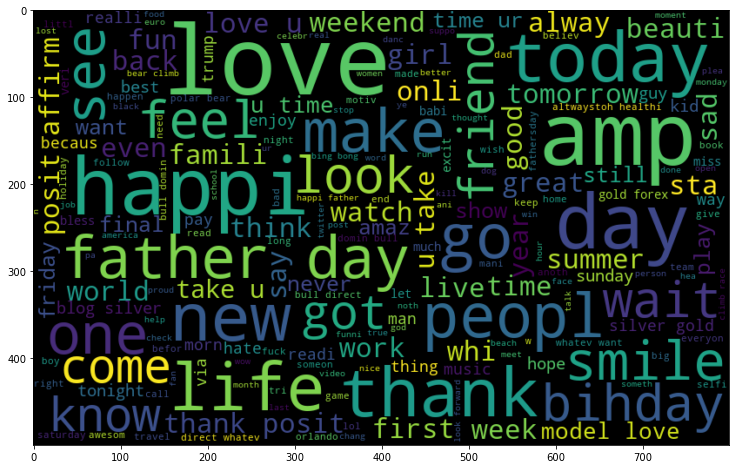

In [52]:

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

We can see most of the words are positive or neutral. Words like love, smile, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

### Words in normal tweets

In [53]:
#def total_words(data):
#    words = []
#    for sentence in data:
#        for word in sentence:
#            words.append(word)
#    all_words = ' '.join([word for word in words])
#    return all_words

In [54]:
normal_words = total_word(combined['tokenized_tweet'][combined['label'] == 0])

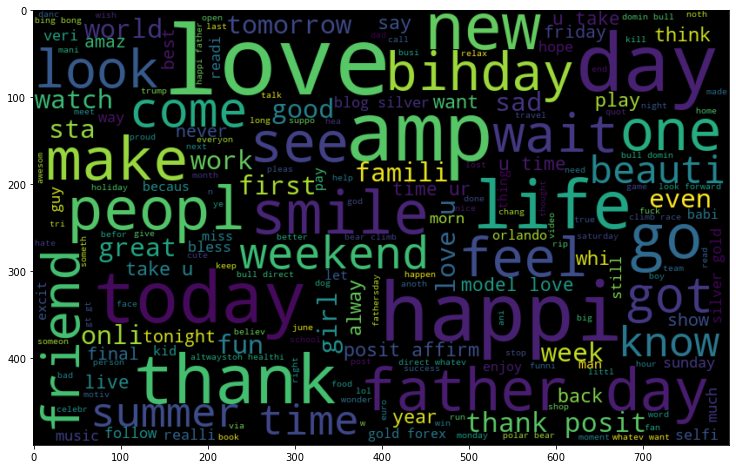

In [55]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(normal_words)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

we can see that there are words like happi, life today, love are most frequent ones in our normal tweets
now lets use the distribution of these words, how many times are they appearing.

In [56]:
normal_word_list = [word for word in normal_words.split(' ')]


In [57]:
#for calculating we will use nltk.freq to find the freqency of how much each word are appearing
freq_normal_words_common =  nltk.FreqDist(normal_word_list).most_common(20)

In [58]:
freq_normal_words_common

[('love', 3209),
 ('day', 2907),
 ('happi', 2094),
 ('thank', 1537),
 ('amp', 1478),
 ('time', 1233),
 ('get', 1208),
 ('life', 1169),
 ('u', 1164),
 ('go', 1117),
 ('like', 1105),
 ('today', 1089),
 ('posit', 990),
 ('father', 954),
 ('make', 949),
 ('new', 931),
 ('smile', 928),
 ('bihday', 889),
 ('good', 858),
 ('see', 843)]

In [59]:
word_normal_df = pd.DataFrame(freq_normal_words_common, columns=['word', 'count'])

In [60]:
word_normal_df

word  count
0     love   3209
1      day   2907
2    happi   2094
3    thank   1537
4      amp   1478
5     time   1233
6      get   1208
7     life   1169
8        u   1164
9       go   1117
10    like   1105
11   today   1089
12   posit    990
13  father    954
14    make    949
15     new    931
16   smile    928
17  bihday    889
18    good    858
19     see    843

Text(0.5, 1.0, 'frequency of most frequent common words appearing in normal tweets')

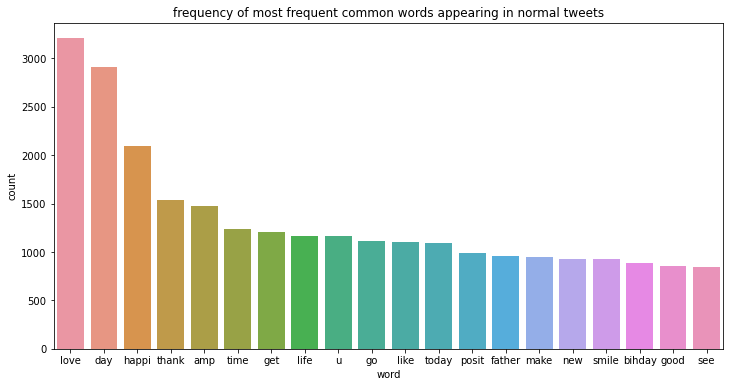

In [61]:
plt.figure(figsize=(12,6))
sns.barplot(data = word_normal_df, x='word', y='count')
plt.title('frequency of most frequent common words appearing in normal tweets')

### words in racist tweet

In [62]:
racist_words = total_word(combined['tokenized_tweet'][combined['label'] == 1])

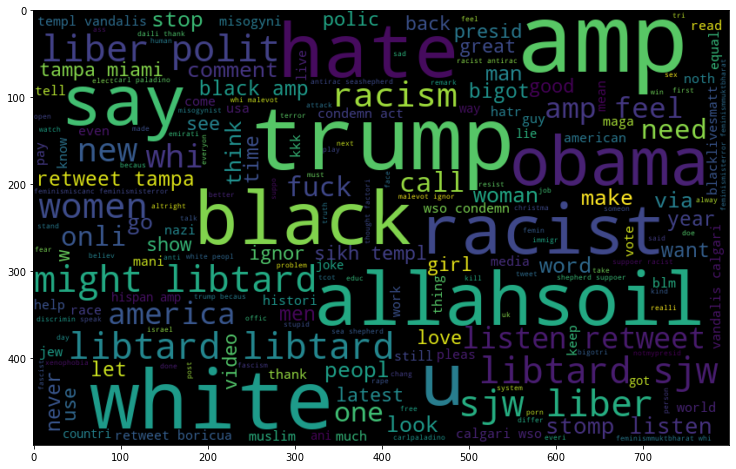

In [63]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(racist_words)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [64]:
racist_word_list = [word for word in racist_words.split(' ')]

In [65]:
common_freq_racist_word = nltk.FreqDist(racist_word_list).most_common(20)

In [66]:
common_freq_racist_word

[('amp', 300),
 ('trump', 217),
 ('white', 159),
 ('libtard', 150),
 ('black', 149),
 ('like', 144),
 ('racist', 114),
 ('polit', 101),
 ('whi', 96),
 ('peopl', 95),
 ('liber', 93),
 ('hate', 93),
 ('allahsoil', 92),
 ('obama', 83),
 ('say', 79),
 ('women', 79),
 ('might', 77),
 ('sjw', 74),
 ('new', 72),
 ('retweet', 68)]

In [67]:
racist_word_df = pd.DataFrame(common_freq_racist_word, columns=['word', 'count'])

In [68]:
racist_word_df

word  count
0         amp    300
1       trump    217
2       white    159
3     libtard    150
4       black    149
5        like    144
6      racist    114
7       polit    101
8         whi     96
9       peopl     95
10      liber     93
11       hate     93
12  allahsoil     92
13      obama     83
14        say     79
15      women     79
16      might     77
17        sjw     74
18        new     72
19    retweet     68

<AxesSubplot:xlabel='word', ylabel='count'>

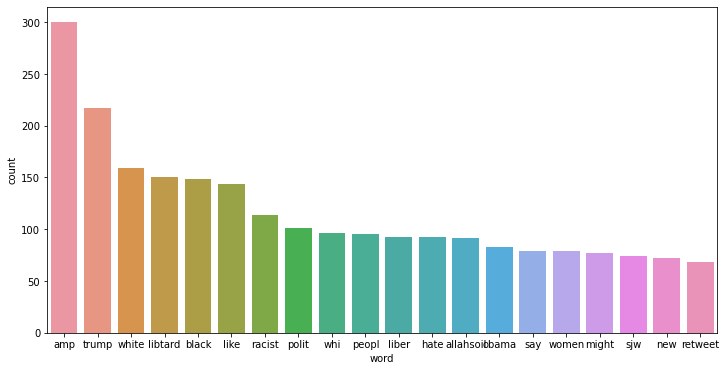

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(data=racist_word_df, x='word', y='count')

## Bag of words feature

https://victorzhou.com/blog/bag-of-words/

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [71]:
bow_vectorize = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [72]:
bow = bow_vectorize.fit_transform(combined['tokenized_tweet'])

In [73]:
bow.shape

(49159, 1000)

### TF IDF Feature

* TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of document

* TF-IDF (term frequency-inverse document frequency) was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

* However, if the word Bug appears many times in a document, while not appearing many times in others, it probably means that it’s very relevant. For example, if what we’re doing is trying to find out which topics some NPS responses belong to, the word Bug would probably end up being tied to the topic Reliability, since most responses containing that word would be about that topic.

- TF = (Number of times term t appears in a document)/(Number of terms in the document)
- IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
- TF-IDF = TF*IDF

In [74]:
tf_idfvectorize = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [75]:
tf_idf = tf_idfvectorize.fit_transform(combined['tokenized_tweet'])

In [76]:
tf_idf.shape

(49159, 1000)

### Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like 
- King - man + woman = Queen

1. Word2Vec Embeddings
Word2Vec is not a single algorithm but a combination of two techniques – 
  - CBOW (Continuous bag of words)
  - Skip-gram model
- Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.
- CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.
- Below is a diagrammatic representation of a 1-word context window Word2Vec model.
https://files.cdn.thinkific.com/file_uploads/118220/images/b06/1d1/2c7/1549270765657.jpg

There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:
  1. It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.
  2. Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:
- https://code.google.com/archive/p/word2vec/

However, for this course, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

In [77]:
import gensim

C:\Users\cws\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [78]:
tokenized_tweet = combined['tokenized_tweet'].apply(lambda x: x.split()) # tokenizing

In [79]:
model_w2c = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200,             # DEsired number of feature
            window=5,
            min_count=2,
            sg=1,                 # For skip gram model
            hs=0,
            negative=10,          # for negative sampling
            workers=1,            # no of cores
            seed=42)

In [80]:
model_w2c.train(tokenized_tweet, total_examples = len(combined['tokenized_tweet']), epochs=20)

(6781267, 7679200)

In [81]:
model_w2c.wv.most_similar(positive='trump')

[('donald', 0.5779512524604797),
 ('yuge', 0.5593339800834656),
 ('dumptrump', 0.5489482283592224),
 ('trumpleak', 0.5441139340400696),
 ('neverump', 0.5409680604934692),
 ('embolden', 0.5384683012962341),
 ('unstabl', 0.5350907444953918),
 ('donaldtrump', 0.5323676466941833),
 ('potus', 0.5323278307914734),
 ('phoni', 0.5304540395736694)]

In [82]:
model_w2c.wv.most_similar(positive='dinner')

[('bolognes', 0.5500360131263733),
 ('whoopppp', 0.5448453426361084),
 ('spaghetti', 0.5401103496551514),
 ('foodcoma', 0.5327507257461548),
 ('swalscha', 0.5281733274459839),
 ('pasta', 0.5238186717033386),
 ('crockpot', 0.5181607604026794),
 ('surabaya', 0.5119483470916748),
 ('lastnight', 0.5075263381004333),
 ('cookout', 0.505933940410614)]

In [83]:
model_w2c.wv.most_similar(positive='obama')

[('michell', 0.5648339986801147),
 ('remark', 0.5299054384231567),
 ('barrack', 0.5282343029975891),
 ('christmasev', 0.5234598517417908),
 ('jackal', 0.5125272274017334),
 ('barack', 0.5050061345100403),
 ('paladino', 0.5028172135353088),
 ('newsrepo', 0.501315712928772),
 ('yorker', 0.49946606159210205),
 ('cuomo', 0.495751291513443)]

### Preparing vectors for tweets
Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

In [84]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count =0
    for word in tokens:
        try:
            vec += model_w2c[word].reshape((1, size))
            count += 1
        except TypeError:
            continue
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return count

In [85]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

In [86]:
wordvec_arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)

In [88]:
wordvec_df

0    1    2    3    4    5    6    7    8    9    ...  190  191  192  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49154  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
49155  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
49156  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
49157  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
49158  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       193  194  195  196  197  198  199  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
49154  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
49155  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
49156  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
49157  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
49158  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[49159 rows x 200 columns]

now we have 200 features but in idf and bow we have 1000 features

In [89]:
wordvec_arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

https://files.cdn.thinkific.com/file_uploads/118220/images/d54/80f/865/1549270765958.jpg

In [93]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import TaggedDocument

In [94]:
def add_label(twt):
    output = []
    for i,s in zip(twt,twt.index):
        output.append(TaggedDocument(s, ['tweet_'+str(i)]))
    return output

In [95]:
labeled_tweet = add_label(tokenized_tweet)

In [96]:
labeled_tweet[:5]

[TaggedDocument(words=0, tags=["tweet_['father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run']"]),
 TaggedDocument(words=1, tags=["tweet_['thank', 'lyft', 'credit', 'use', 'caus', 'offer', 'wheelchair', 'van', 'pdx', 'disapoint', 'getthank']"]),
 TaggedDocument(words=2, tags=["tweet_['bihday', 'majesti']"]),
 TaggedDocument(words=3, tags=["tweet_['model', 'love', 'u', 'take', 'u', 'time', 'ur']"]),
 TaggedDocument(words=4, tags=["tweet_['factsguid', 'societi', 'motiv']"])]

## XGBoost

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [230]:
from xgboost import XGBClassifier

### bow features

In [231]:
train.shape

(31962, 3)

In [232]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [238]:
Xtrain_bow, Xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state = 42, test_size=0.3)

9635     0
2447     0
16134    0
18393    0
4420     0
        ..
29802    0
5390     0
860      1
15795    0
23654    0
Name: label, Length: 22373, dtype: int64

In [242]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)

In [243]:
xgb_model.fit(Xtrain_bow, ytrain)

C:\Users\cws\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:38:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [245]:
prediction = xgb_model.predict(Xvalid_bow)

In [246]:
f1_score(yvalid, prediction)

0.5497287522603977

### TF-IDF Features

In [250]:
train_tfidf = tf_idf[:31962,:]
test_tfidf = tf_idf[31962:,:]

In [252]:
Xtrain_tfidf = train_tfidf[ytrain.index]
Xvalid_tfidf = train_tfidf[yvalid.index]

In [254]:
xgb_model.fit(Xtrain_tfidf, ytrain)

C:\Users\cws\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [255]:
prediction = xgb_model.predict(Xvalid_tfidf)

In [256]:
f1_score(yvalid, prediction)

0.5641921397379912

## word2vecfeatures

In [258]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

In [259]:
train_w2v

0    1    2    3    4    5    6    7    8    9    ...  190  191  192  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
31957  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
31958  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
31959  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
31960  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
31961  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       193  194  195  196  197  198  199  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
31957  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
31958  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
31959  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
31960  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
31961  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[31962 rows x 200 columns]

In [260]:
Xtrain_w2v = train_w2v.iloc[ytrain.index,:]
Xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [266]:
xgb_model.fit(Xtrain_w2v, ytrain)

C:\Users\cws\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [267]:
prediction = xgb_model.predict(Xvalid_w2v)

In [268]:
f1_score(yvalid, prediction)

0.0